In [3]:
!pip install gdown

In [5]:
!gdown 1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc

Downloading...
From: https://drive.google.com/uc?id=1YAQHOBSmpDfwYeFq1dMQv94DyYPkp7Xc
To: C:\Users\kolov\Desktop\VNP\alzheimer.csv

  0%|          | 0.00/2.38M [00:00<?, ?B/s]
 22%|##2       | 524k/2.38M [00:00<00:01, 1.61MB/s]
 44%|####4     | 1.05M/2.38M [00:00<00:00, 1.59MB/s]
 66%|######6   | 1.57M/2.38M [00:01<00:00, 1.48MB/s]
 88%|########8 | 2.10M/2.38M [00:01<00:00, 1.20MB/s]
100%|##########| 2.38M/2.38M [00:01<00:00, 1.13MB/s]
100%|##########| 2.38M/2.38M [00:01<00:00, 1.25MB/s]


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv('alzheimer.csv')

In [3]:
data.sample(10)

,PatientID,Domain,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
16729,P016730,Neurology,26.0,19.33,81.0,147.0,206.0,78.59,57.04,High Risk,Yes,Deteriorated
12562,P012563,Cardiology,48.0,28.66,65.0,100.0,183.0,67.05,67.98,Low Risk,No,Deteriorated
12896,P012897,Cardiology,52.0,28.19,79.0,112.0,228.0,74.07,85.60,High Risk,No,Improved
21767,P021768,Cardiology,60.0,26.42,68.0,125.0,204.0,86.11,61.17,High Risk,No,Deteriorated
5249,P005250,Cardiology,23.0,34.43,65.0,124.0,189.0,82.58,55.62,High Risk,No,Improved
29070,P029071,Pediatrics,46.0,33.37,83.0,100.0,246.0,67.38,60.78,High Risk,Yes,Deteriorated
15161,P015162,Neurology,49.0,26.83,83.0,120.0,206.0,66.31,76.67,Low Risk,No,Stable
28338,P028339,Cardiology,49.0,27.38,83.0,129.0,211.0,85.73,60.17,High Risk,No,Stable
9720,P009721,Neurology,51.0,26.13,62.0,104.0,198.0,69.11,59.18,High Risk,Yes,Improved
3858,P003859,Pediatrics,71.0,23.86,81.0,127.0,266.0,85.90,73.11,High Risk,Yes,Improved


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'HeartRate'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'CognitiveTestScore'}>],
       [<Axes: title={'center': 'StressMobilityTestScore'}>, <Axes: >,
        <Axes: >]], dtype=object)

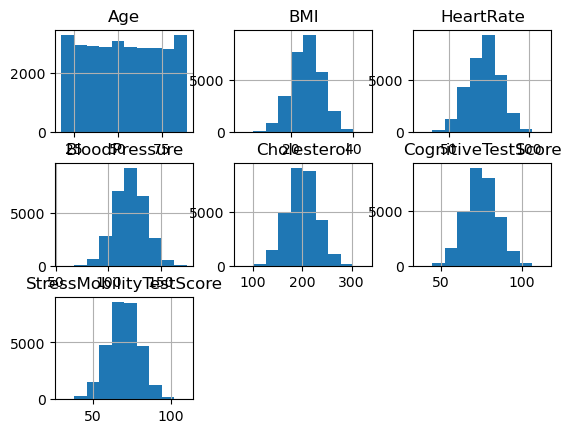

In [7]:
data.hist()

In [13]:
def drop_data(data,columns):
    data_copy = data.copy()
    data_copy.drop(columns,axis=1,inplace=True)
    return data_copy

In [21]:
def impute(data,columns,strategy):
    imp = SimpleImputer(strategy=strategy)
    data_copy = data.copy()

    for c in columns:
        data_copy[c] = imp.fit_transform(data_copy[[c]])
    return data_copy

In [23]:
def label(data,columns):
    label = LabelEncoder()
    data_copy = data.copy()

    for c in columns:
        data_copy[c] = label.fit_transform(data_copy[[c]].astype(str).values.ravel())
    return data_copy

In [25]:
data = drop_data(data=data,columns=['PatientID', 'Domain'])
data.head()

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
0,62.0,28.09,69.0,115.0,206.0,82.78,59.68,High Risk,No,Stable
1,19.0,22.83,78.0,116.0,196.0,76.00,60.13,Low Risk,No,Improved
2,18.0,27.40,71.0,116.0,200.0,58.52,68.76,Low Risk,Yes,Deteriorated
3,47.0,27.81,78.0,105.0,176.0,83.56,70.71,Medium Risk,Yes,Improved
4,38.0,17.92,69.0,113.0,208.0,74.45,76.36,High Risk,No,Stable


In [27]:
data = impute(data=data,columns=['Age','BMI','HeartRate','BloodPressure','Cholesterol',	'CognitiveTestScore','StressMobilityTestScore'],strategy='mean')
data = label(data=data,columns=['RiskLevel','FamilyHistoryDementia','TreatmentResponse'])

In [29]:
data.sample(10)

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,RiskLevel,FamilyHistoryDementia,TreatmentResponse
25843,75.0,28.89,84.0,85.0,215.0,72.52,77.730000,2,0,0
6539,26.0,19.58,55.0,132.0,168.0,85.41,56.320000,1,0,1
21811,23.0,24.14,58.0,107.0,278.0,74.15,69.070000,2,0,2
1026,52.0,22.80,81.0,107.0,258.0,61.51,82.150000,0,0,1
20704,23.0,31.89,65.0,110.0,218.0,100.01,51.990000,2,0,2
26335,80.0,29.33,65.0,110.0,181.0,67.83,73.250000,1,0,1
20705,80.0,26.00,66.0,112.0,209.0,79.19,80.010000,0,0,2
23869,77.0,25.48,72.0,105.0,214.0,88.22,92.450000,1,1,0
22559,56.0,28.27,64.0,117.0,229.0,76.22,69.950843,1,0,0
18557,47.0,27.80,78.0,123.0,254.0,66.16,70.660000,1,0,2


In [31]:
inputD = data.copy()
inputD = drop_data(data=inputD, columns=['RiskLevel'])
inputD.sample(5)

,Age,BMI,HeartRate,BloodPressure,Cholesterol,CognitiveTestScore,StressMobilityTestScore,FamilyHistoryDementia,TreatmentResponse
25832,33.0,15.90,72.0,117.0,240.0,70.97,58.21,0,1
4776,21.0,23.76,70.0,91.0,184.0,90.27,62.52,0,0
9134,59.0,14.85,82.0,112.0,209.0,61.12,64.80,0,2
22582,30.0,19.05,73.0,119.0,173.0,73.80,63.31,1,1
15432,34.0,29.49,53.0,106.0,176.0,73.60,53.46,0,2


In [33]:
targetD = data.copy()['RiskLevel']
targetD.sample(5)

6743     2
25696    2
2181     1
24656    0
10995    1
Name: RiskLevel, dtype: int32

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(inputD,targetD,test_size =0.2)

In [59]:
model = XGBClassifier(max_depth=5, min_child_weight=1, n_estimators=100, n_jobs=-1, learning_rate=0.1)
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [61]:
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.31      0.32      1940
           1       0.35      0.45      0.39      2086
           2       0.33      0.24      0.28      1974

    accuracy                           0.34      6000
   macro avg       0.33      0.33      0.33      6000
weighted avg       0.33      0.34      0.33      6000



In [63]:
model2 = DecisionTreeClassifier(max_depth=3)
model2 = model2.fit(X_train,Y_train)
y_pred = model2.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.49      0.40      1940
           1       0.37      0.54      0.44      2086
           2       0.32      0.01      0.03      1974

    accuracy                           0.35      6000
   macro avg       0.34      0.35      0.29      6000
weighted avg       0.34      0.35      0.29      6000

